In [1]:
%load_ext autoreload

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import uncertainties as unc
from uncertainties import unumpy as unp
import numpy as np
from sys import path
import pandas as pd

path.append('../pylib')
path.append('..')
from emc import *
from targets import mc_target_df

%autoreload 2
%aimport emc

In [3]:
server = 'seaquel.physics.illinois.edu'
analysis_schema = 'user_dannowitz_mc_truth'
mc_schema_list = ['mc_drellyan_LH2_M013_S002',
                  'mc_drellyan_LD2_M013_S002',
                  'mc_drellyan_C_M013_S002']
analysis_table = 'mDimuon_analysis'
fresh_start = False
#fresh_start = True

In [6]:
dimuon_df = get_dimuon_df(server=server, 
                          analysis_schema=analysis_schema, 
                          source_schema_list=mc_schema_list,
                          analysis_table=analysis_table,
                          fresh_start=fresh_start,
                          truth_mc=True)

In [78]:
dimuon_df.to_csv('dimuon_mc_M013_S002.tsv', sep='\t')

In [19]:
dimuon_df = pd.read_csv('dimuon_mc_M013_S002.tsv', sep='\t', index_col='Unnamed: 0')

In [18]:
#bin_edges = [0.08, 0.14, 0.16, 0.18, 0.21, 0.25, 0.31, 0.53]
#bin_edges = [i*0.05 for i in range(1,11)]; bin_edges
bin_edges = [i*0.08 for i in range(1,8)]; bin_edges

[0.08, 0.16, 0.24, 0.32, 0.4, 0.48, 0.56]

In [21]:
emc_df, means_list, means_df = emc_analysis(dimuon_df,
                                            None,
                                            (),
                                            bin_edges,
                                            qie_correction=False,
                                            truth_mc=True)

In [22]:
del dimuon_df

In [23]:
emc_df.to_csv('emc_mc_M013_S002_bin2.tsv', sep='\t')

In [5]:
emc_df = pd.read_csv('emc_mc_M013_S002.tsv', sep='\t',
                     index_col='Unnamed: 0')
emc_df[['C/D', 'C/H', 'D/H']] = emc_df[['C/D', 'C/H', 'D/H']].applymap(unc.ufloat_fromstr)

In [24]:
emc_df

,xT,D/H,C/D,C/H
"(0.08, 0.16]",0.131+/-0.018,1.195+/-0.011,1.019+/-0.010,1.217+/-0.011
"(0.16, 0.24]",0.200+/-0.023,1.159+/-0.009,1.004+/-0.008,1.163+/-0.009
"(0.24, 0.32]",0.280+/-0.023,1.013+/-0.009,0.986+/-0.008,0.998+/-0.009
"(0.32, 0.40]",0.360+/-0.023,0.818+/-0.008,1.004+/-0.009,0.821+/-0.008
"(0.40, 0.48]",0.440+/-0.023,0.725+/-0.007,0.990+/-0.010,0.717+/-0.007
"(0.48, 0.56]",0.518+/-0.023,0.689+/-0.008,1.007+/-0.012,0.694+/-0.008


In [25]:
bin_centers = unp.nominal_values(emc_df['xT'].values)
lower_val = np.subtract(bin_centers,bin_edges[:-1])
upper_val = np.subtract(bin_edges[1:], bin_centers)
asymmetric_bars = [lower_val, upper_val]

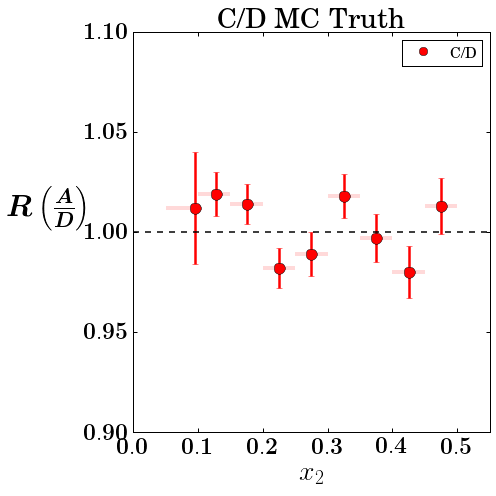

In [8]:
plot_one_emc(bin_centers, asymmetric_bars,
             [emc_df['C/D']],
             [r'C/D'], 
             lims=(0.0, 0.55, 0.9, 1.1),
             title='C/D MC Truth')

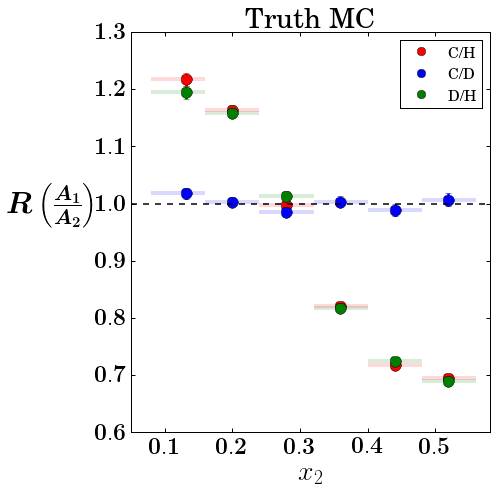

In [26]:
plot_one_emc(bin_centers, asymmetric_bars,
             [emc_df['C/H'], emc_df['C/D'], emc_df['D/H']],
             [r'C/H', r'C/D', r'D/H'], 
             lims=(0.05, 0.58, 0.6, 1.3),
             title='Truth MC',
             savefile='c-d-h-truth-mc.png',
             ylabel=r'$\boldsymbol{R\left(\frac{A_1}{A_2}\right)}$')